# Dummy variables (used for categorical) 
## Two types -
* Nominal
* Ordinal

In [73]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression as LR 
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt 
import joblib

In [46]:
df = pd.read_csv("./data/carprices-data.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [47]:
df.rename(columns={"Car Model" : "car_model", "Mileage" : "mileage", "Sell Price($)" : "sell_price", "Age(yrs)" : "age"}, inplace=True)
df

,car_model,mileage,sell_price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [49]:
df_dummies = pd.get_dummies(df["car_model"], drop_first=True)
df_dummies.rename(columns={"Audi A5": "audi", "BMW X5":"bmw","Mercedez Benz C class":"mercedez"}, inplace=True)
df_dummies

,bmw,mercedez
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


In [50]:
df = pd.concat([df, df_dummies], axis='columns')
df.drop(["car_model"], axis='columns', inplace=True)
df

,mileage,sell_price,age,bmw,mercedez
0,69000,18000,6,True,False
1,35000,34000,3,True,False
2,57000,26100,5,True,False
3,22500,40000,2,True,False
4,46000,31500,4,True,False
5,59000,29400,5,False,False
6,52000,32000,5,False,False
7,72000,19300,6,False,False
8,91000,12000,8,False,False
9,67000,22000,6,False,True


In [84]:
X = df.drop(["sell_price"], axis='columns').values
y = df["sell_price"]
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

In [77]:
model = LR()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [91]:
price_predict = model.predict(X_test)
price_predict

array([34629.02847309, 19227.40926158, 30867.13078849])

In [92]:
y_test

1     34000
10    20000
12    33000
Name: sell_price, dtype: int64

In [93]:
model.score(X_test, y_test)
# good score -> 6+ 
# bad score -> below 5
# excellent model -> 8 - 9+

0.9545761939140759

C:\ProgramData\anaconda3\envs\jupyter_env\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


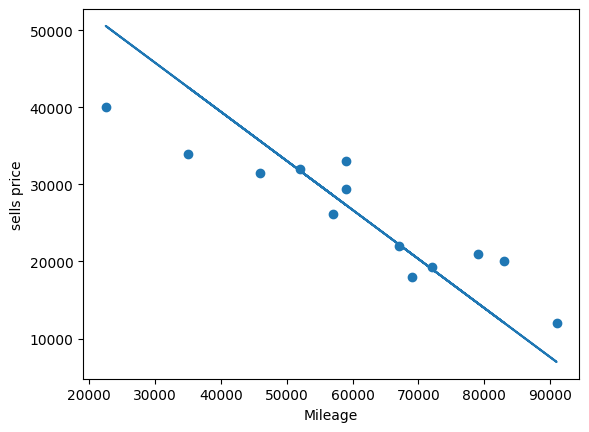

In [94]:
%matplotlib inline

x_vis = pd.DataFrame({
    "mileage" : df["mileage"],
    "age" : np.mean(df["age"]),
    "bmw" : np.mean(df["bmw"]),
    "mercedez" : np.mean(df["mercedez"])
})
plt.xlabel("Mileage")
plt.ylabel("sells price")
plt.scatter(df["mileage"], df["sell_price"])
plt.plot(df["mileage"], model.predict(x_vis))
plt.show()

In [95]:
joblib.dump(model, "./saved_models/dummy_model.joblib")

['./saved_models/dummy_model.joblib']